In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df=pd.read_csv('placement.csv')

In [7]:
df.sample(3)

,cgpa,placement_exam_marks,placed
68,6.58,30.0,0
97,7.33,52.0,1
112,7.23,15.0,0


C:\Users\Personal\AppData\Local\Temp\ipykernel_5060\1213736394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False)


<Axes: xlabel='cgpa', ylabel='Density'>

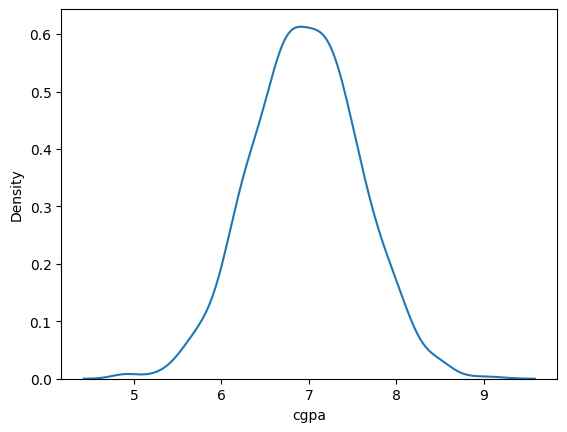

In [11]:
sns.distplot(df['cgpa'],hist=False)

C:\Users\Personal\AppData\Local\Temp\ipykernel_5060\2406320711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],hist=False)


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

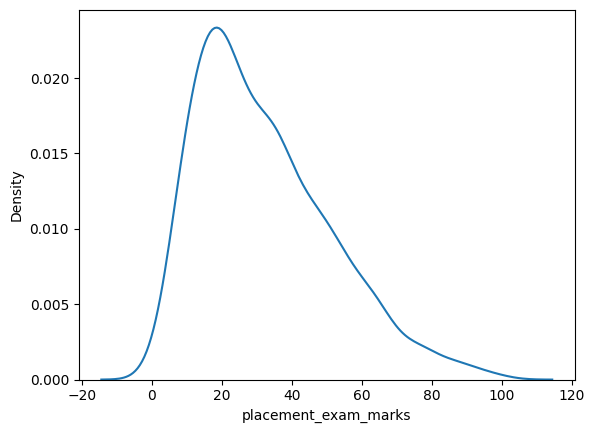

In [13]:
sns.distplot(df['placement_exam_marks'],hist=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x26474a1e730>,
 'caps': [<matplotlib.lines.Line2D at 0x264749c2d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2647615b1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x264749e47f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x264749e44c0>],
 'means': []}

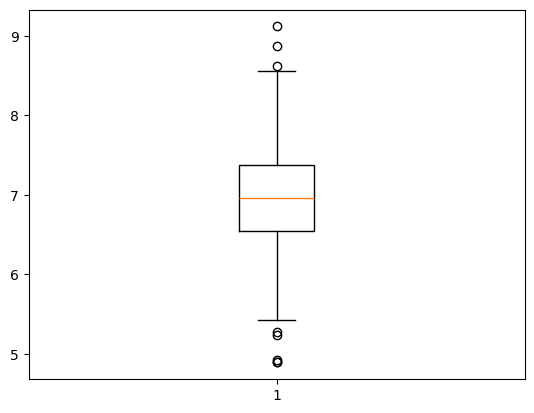

In [20]:
plt.boxplot(df['cgpa'])

In [17]:
std=df['cgpa'].std()
mean=df['cgpa'].mean()
max=df['cgpa'].max()
min=df['cgpa'].min()

In [18]:
min

4.89

# Trimming Outlier

In [47]:
maxallowed=mean+ 3*std
minallowed=mean- 3*std
print(maxallowed)
print(minallowed)

8.808933625397168
5.113546374602832


In [41]:
df[(df['cgpa']<minallowed) | (df['cgpa']>maxallowed)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [45]:
new_df=df[(df['cgpa']>minallowed) & (df['cgpa']<maxallowed)]

In [46]:
new_df['cgpa'].describe()

count    995.000000
mean       6.963357
std        0.600082
min        5.230000
25%        6.550000
50%        6.960000
75%        7.365000
max        8.620000
Name: cgpa, dtype: float64

# Capping

In [49]:
df.shape

(1000, 3)

In [50]:
std=df['cgpa'].std()
mean=df['cgpa'].mean()
max=df['cgpa'].max()
min=df['cgpa'].min()

In [59]:
df['cgpa']=np.where(df['cgpa'] < minallowed, minallowed, np.where( df['cgpa']>maxallowed, maxallowed, df['cgpa'] ))

In [62]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64